In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew


# **Analyze data set**

In [ ]:
dataset = pd.read_csv('TechCorner_Sales_update.csv')
dataset.head()

,Cus.ID,Date,Cus. Location,Age,Gender,Mobile Name,Sell Price,Does he/she Come from Facebook Page?,Does he/she Followed Our Page?,Did he/she buy any mobile before?,Did he/she hear of our shop before?
0,1,27-05-2024,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2,27-05-2024,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,3,27-05-2024,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,4,27-05-2024,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,5,27-05-2024,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


In [ ]:
dataset.columns = ['customer_id','purchase_date', 'customer_location','age', 'gender', 'mobile_model', 'price', 'is_from_facebook_page',
                   'is_facebook_page_follower', 'is_returning_customer', 'awareness_through_marketing']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  8871 non-null   int64  
 1   purchase_date                8871 non-null   object 
 2   customer_location            8871 non-null   object 
 3   age                          8871 non-null   int64  
 4   gender                       8871 non-null   object 
 5   mobile_model                 8871 non-null   object 
 6   price                        8871 non-null   float64
 7   is_from_facebook_page        8871 non-null   object 
 8   is_facebook_page_follower    8871 non-null   object 
 9   is_returning_customer        8871 non-null   object 
 10  awareness_through_marketing  8871 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 762.5+ KB


**There is no missing data**

In [ ]:
dataset.describe()

,customer_id,age,price
count,8871.000000,8871.000000,8871.00000
mean,4436.000000,34.047007,25068.38654
std,2560.981452,9.592612,18032.80271
min,1.000000,18.000000,12702.00000
25%,2218.500000,26.000000,17466.50000
50%,4436.000000,34.000000,21682.00000
75%,6653.500000,42.000000,25777.50000
max,8871.000000,50.000000,200465.00000


### **All dates are valid?**

In [ ]:
dataset['purchase_date'] = pd.to_datetime(dataset['purchase_date'], errors='raise', dayfirst=True)


## **Freequency Plots**

### **Customer Location Cardinality**

Text(0.5, 1.0, 'Frequency Counts of Customer Locations')

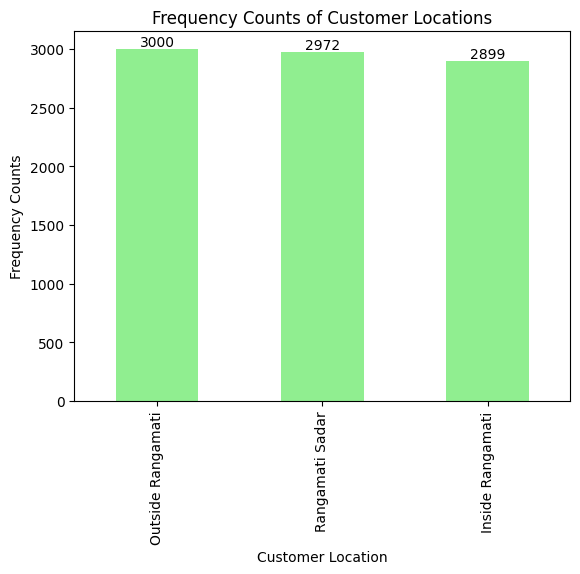

In [ ]:
customer_location_value_counts = dataset['customer_location'].value_counts()
# print(customer_location_value_counts)
ax = customer_location_value_counts.plot(kind='bar', color='lightgreen')

for idx, count in enumerate(customer_location_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Customer Location')
plt.ylabel('Frequency Counts')
plt.title('Frequency Counts of Customer Locations')

### **Gender Cardinality**

Text(0.5, 1.0, 'Frequency Counts of Gender')

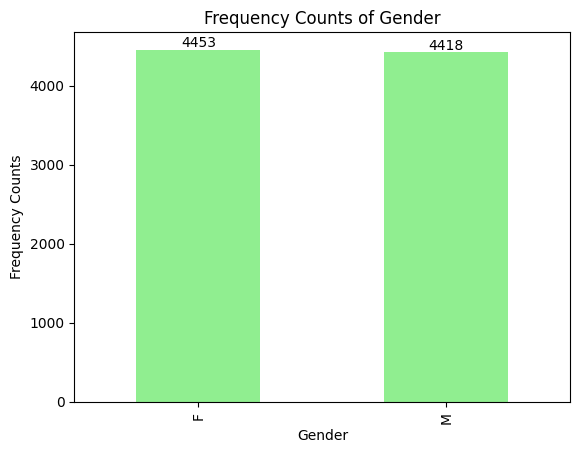

In [ ]:
gender_value_counts = dataset['gender'].value_counts()
ax = gender_value_counts.plot(kind='bar', color='lightgreen')
for idx, count in enumerate(gender_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Gender')
plt.ylabel('Frequency Counts')
plt.title('Frequency Counts of Gender')



### **Mobile Model Cardinality**

Text(0.5, 1.0, 'Frequency Counts of Mobile Model')

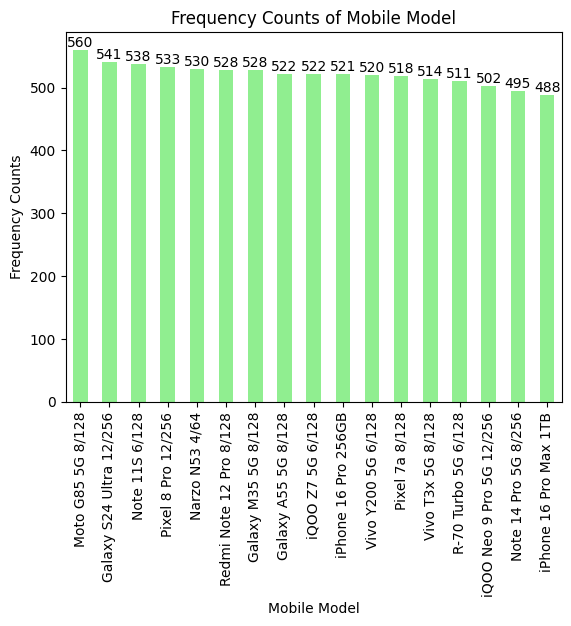

In [ ]:
mobile_model_value_counts = dataset['mobile_model'].value_counts()
ax = mobile_model_value_counts.plot(kind = 'bar', color = 'lightgreen')
for idx, count in enumerate(mobile_model_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Mobile Model')
plt.ylabel('Frequency Counts')
plt.title('Frequency Counts of Mobile Model')

Text(0.5, 1.0, 'Is From Face Book Page Frequency Counts')

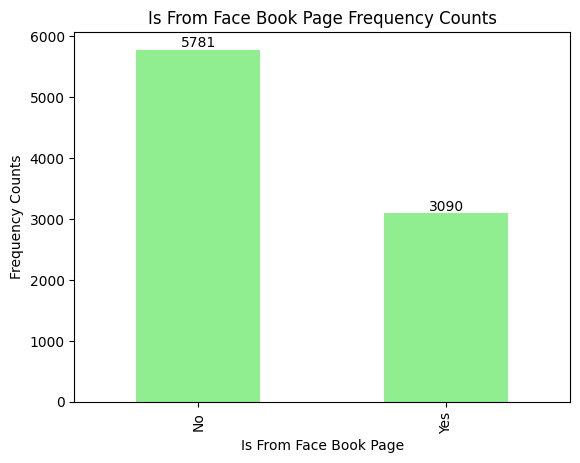

In [ ]:
is_from_facebook_page_value_counts = dataset['is_from_facebook_page'].value_counts()
# print(is_from_facebook_page_value_counts)
ax = is_from_facebook_page_value_counts.plot(kind='bar', color='lightgreen')

for idx, count in enumerate(is_from_facebook_page_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Is From Face Book Page')
plt.ylabel('Frequency Counts')
plt.title('Is From Face Book Page Frequency Counts')

**Is From Face Book Page: Moderately Imbalanced data, "Yes" class is around 36% where as "No" class is around 64%.**

Text(0.5, 1.0, 'Face Book Page Follower Frequency Counts')

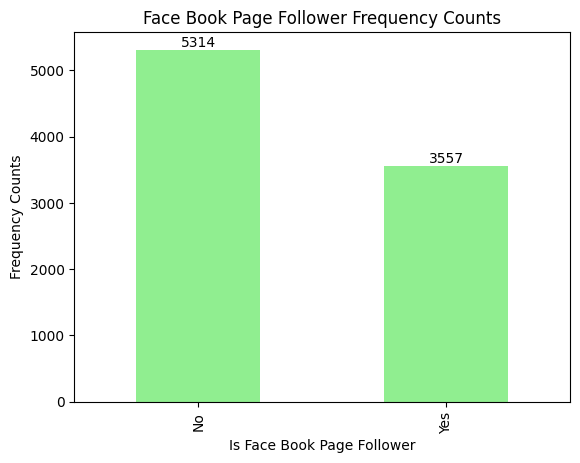

In [ ]:
is_facebook_page_follower_value_counts = dataset['is_facebook_page_follower'].value_counts()
# print(is_facebook_page_follower_value_counts)
ax = is_facebook_page_follower_value_counts.plot(kind='bar', color='lightgreen')

for idx, count in enumerate(is_facebook_page_follower_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Is Face Book Page Follower')
plt.ylabel('Frequency Counts')
plt.title('Face Book Page Follower Frequency Counts')

Text(0.5, 1.0, 'Returning Customer Frequency Counts')

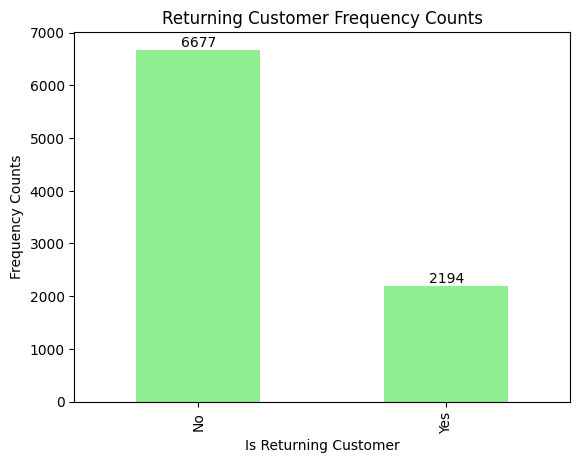

In [ ]:

is_returning_customer_value_counts = dataset['is_returning_customer'].value_counts()
# print(is_facebook_page_follower_value_counts)
ax = is_returning_customer_value_counts.plot(kind='bar', color='lightgreen')

for idx, count in enumerate(is_returning_customer_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Is Returning Customer')
plt.ylabel('Frequency Counts')
plt.title('Returning Customer Frequency Counts')

**Is Returning Customer: Moderately Imbalanced data, "Yes" class is around 25% where as "No" class is around 75%**

Text(0.5, 1.0, 'Awareness Through Marketing - Frequency Counts')

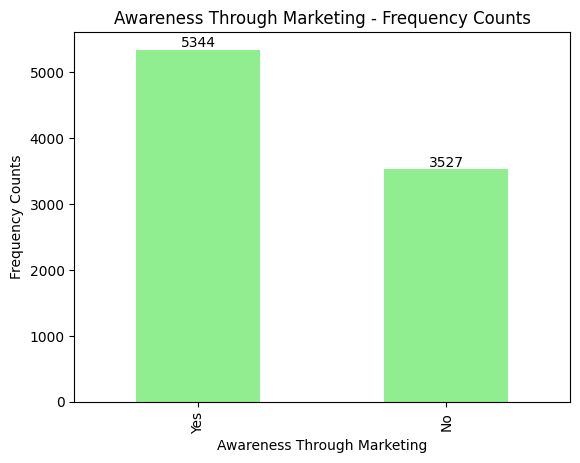

In [ ]:
awareness_through_marketing_value_counts = dataset['awareness_through_marketing'].value_counts()
# print(awareness_through_marketing_value_counts)
ax = awareness_through_marketing_value_counts.plot(kind='bar', color='lightgreen')

for idx, count in enumerate(awareness_through_marketing_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Awareness Through Marketing')
plt.ylabel('Frequency Counts')
plt.title('Awareness Through Marketing - Frequency Counts')

## Distribution Analysis

### Histogram for Age ###

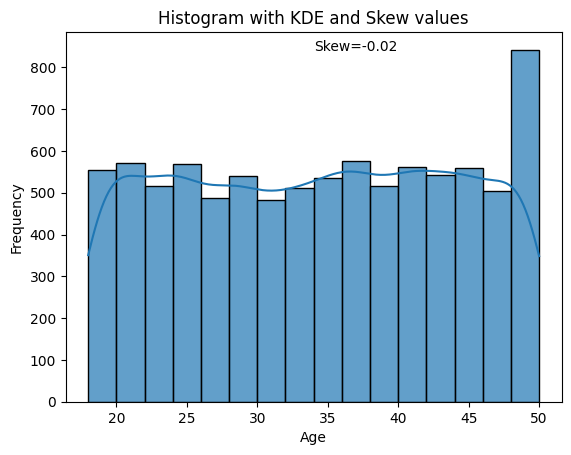

In [ ]:
sns.histplot(data=dataset['age'], bins=16, edgecolor='black', alpha=0.7, kde=True)
plt.annotate(text=f"Skew={np.round(skew(dataset['age']), decimals=2)}", xy=(0.5, 0.95), xycoords='axes fraction')
plt.title('Histogram with KDE and Skew values')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Histogram for Price ###

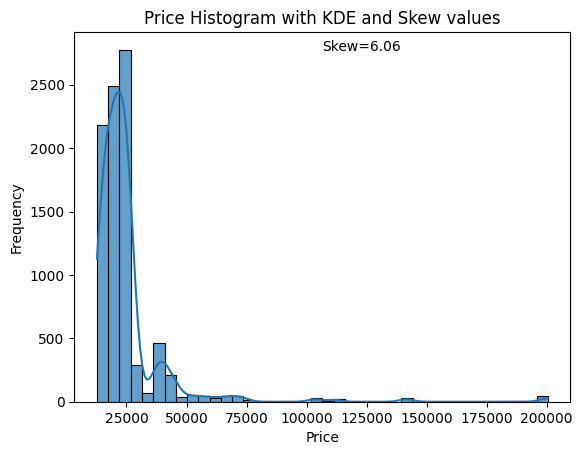

In [ ]:
sns.histplot(data=dataset['price'], bins=40, edgecolor='black', alpha=0.7, kde=True)
plt.annotate(text=f"Skew={np.round(skew(dataset['price']), decimals=2)}", xy=(0.5, 0.95), xycoords='axes fraction')
plt.title('Price Histogram with KDE and Skew values')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Price: High positive skew value 6.06 observed**

### Log Transformation of Price to reduce Skew

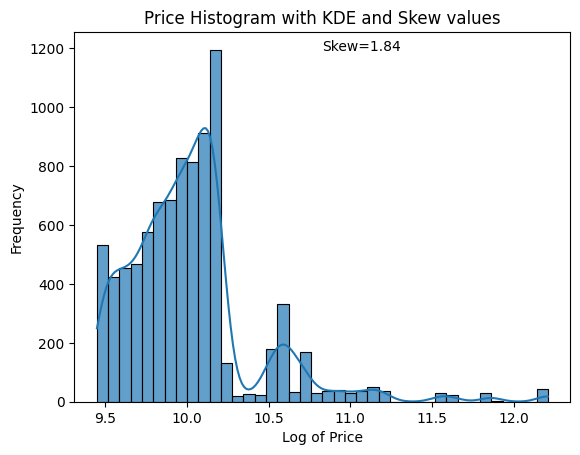

In [ ]:
dataset['log_price'] = np.log(dataset['price'])
sns.histplot(data=dataset['log_price'], bins=40, edgecolor='black', alpha=0.7, kde=True)
plt.annotate(text=f"Skew={np.round(skew(dataset['log_price']), decimals=2)}", xy=(0.5, 0.95), xycoords='axes fraction')
plt.title('Price Histogram with KDE and Skew values')
plt.xlabel('Log of Price')
plt.ylabel('Frequency')
plt.show()

### Box-Cox Transformation for Price

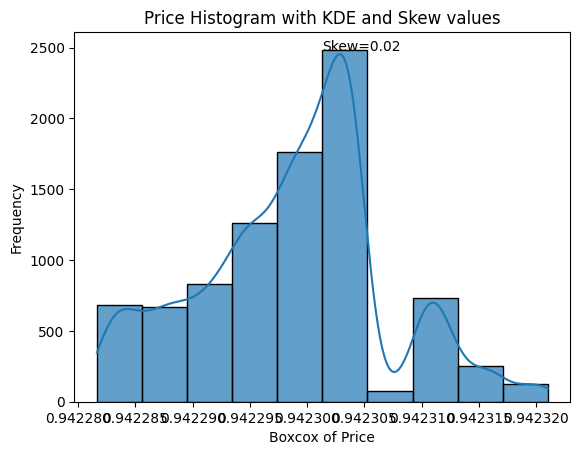

In [ ]:
from scipy.stats import boxcox
dataset['boxcox_price'], lambda_bc = boxcox(dataset['price'])
sns.histplot(data=dataset['boxcox_price'], bins=10, edgecolor='black', alpha=0.7, kde=True)
plt.annotate(text=f"Skew={np.round(skew(dataset['boxcox_price']), decimals=2)}", xy=(0.5, 0.95), xycoords='axes fraction')
plt.title('Price Histogram with KDE and Skew values')
plt.xlabel('Boxcox of Price')
plt.ylabel('Frequency')
plt.show()

**Price: Boxcox Transformation is able to reduce skew value to around 0.02 from 6.06.**

### Box Plot to detect outliers in BoxCox Transformed price

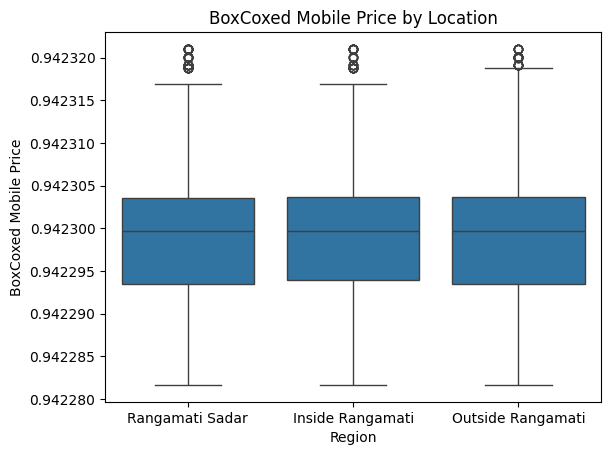

In [ ]:
sns.boxplot(data=dataset, y='boxcox_price', x='customer_location')
plt.xlabel('Region')
plt.ylabel('BoxCoxed Mobile Price')
plt.title('BoxCoxed Mobile Price by Location')
plt.show()


## Variation in Age by Location and Gender

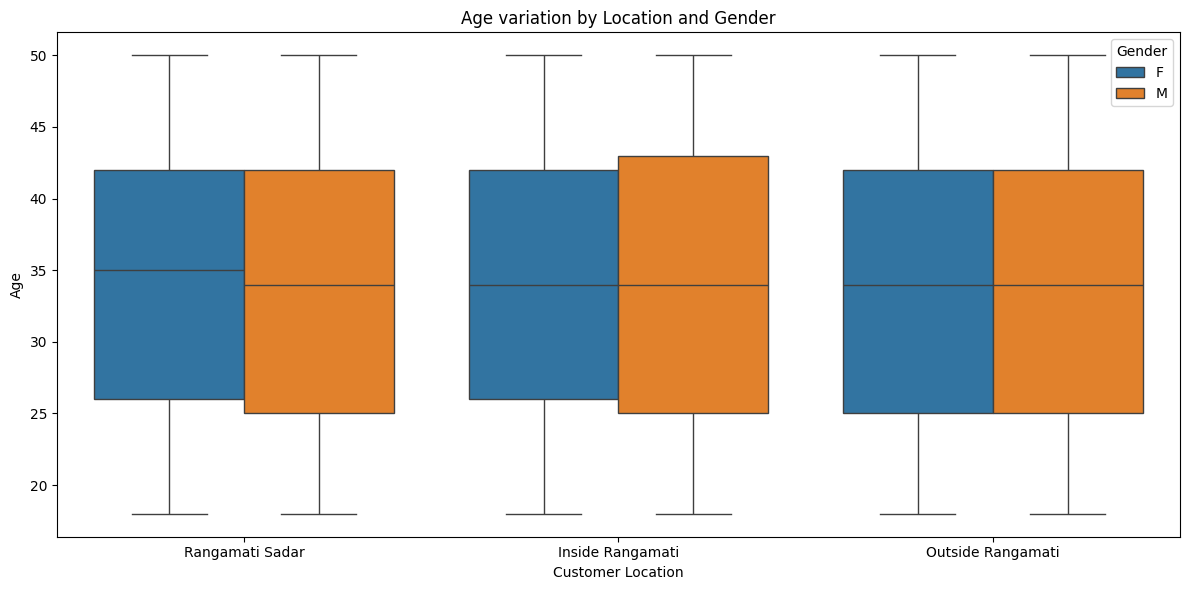

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='customer_location', y='age', data=dataset, hue='gender')
plt.title('Age variation by Location and Gender')
plt.xlabel('Customer Location')
plt.ylabel('Age')
plt.legend(loc='upper right', title='Gender')
plt.tight_layout()
plt.show()

## Age distribution by Gender

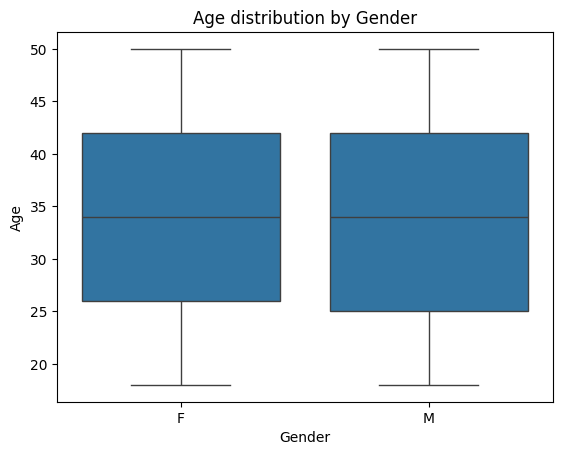

In [ ]:
sns.boxplot(data=dataset, x='gender', y='age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age distribution by Gender')
plt.show()

## Purchase Trends

In [ ]:
purchase_trends = dataset.groupby('customer_location')['price'].agg(["count", "mean", "max", "sum"])
purchase_trends

,count,mean,max,sum
customer_location,,,,
Inside Rangamati,2899,24866.202484,200395.0,72087121.0
Outside Rangamati,3000,24852.985333,200353.0,74558956.0
Rangamati Sadar,2972,25483.034993,200465.0,75735580.0


**Highest Volumes of sales are done at Rangamati Sadar Location**

### Sales Performance by Region

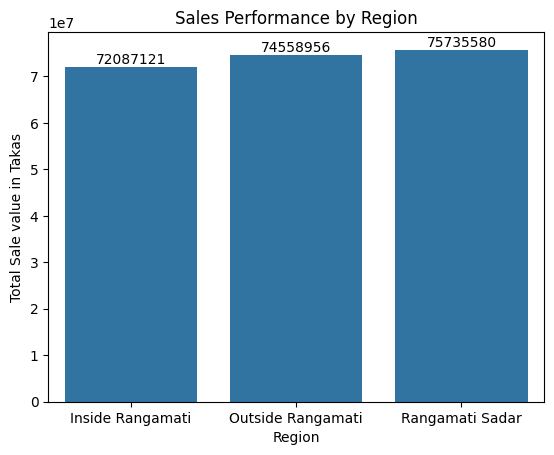

In [ ]:
ax = sns.barplot(data=purchase_trends, x='customer_location', y='sum')

for bar in ax.containers:
  ax.bar_label(bar, fmt="%.0f")

plt.title('Sales Performance by Region')
plt.xlabel('Region')
plt.ylabel('Total Sale value in Takas')
plt.show()

### Average Spending on Mobile Purchase by Region

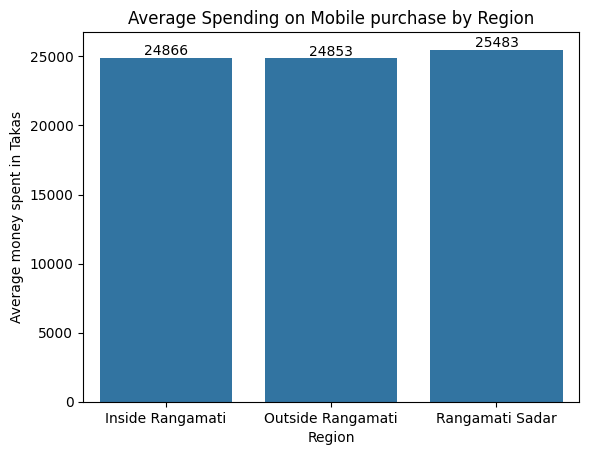

In [ ]:
ax = sns.barplot(data=purchase_trends, x='customer_location', y='mean')

for bar in ax.containers:
  ax.bar_label(bar, fmt="%.0f")

plt.title('Average Spending on Mobile purchase by Region')
plt.xlabel('Region')
plt.ylabel('Average money spent in Takas')
plt.show()

### Box Plot - Mobile Sale Price by Location

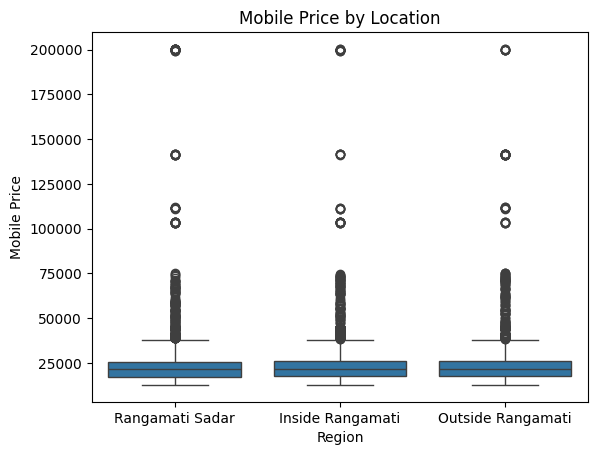

In [ ]:
sns.boxplot(data=dataset, x='customer_location', y='price')
plt.xlabel('Region')
plt.ylabel('Mobile Price')
plt.title('Mobile Price by Location')
plt.show()

### Monthly Purchase Trends

purchase_date
2024-05-31     3677909.0
2024-06-30    22097229.0
2024-07-31    22418167.0
2024-08-31    22680738.0
2024-09-30    23920195.0
2024-10-31    23454984.0
2024-11-30    20392339.0
2024-12-31    23021093.0
2025-01-31    21952542.0
2025-02-28    21798072.0
2025-03-31    16968389.0
Freq: ME, Name: price, dtype: float64


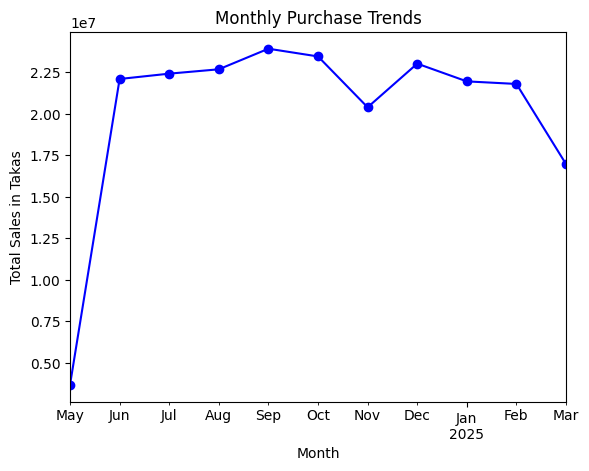

In [ ]:
date_indexed_dataset = dataset.set_index('purchase_date')
monthly_sales = date_indexed_dataset.resample('ME')['price'].sum()
print(monthly_sales)
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales in Takas')
plt.title('Monthly Purchase Trends')
plt.show()

**Highest Sales are recorded in September Month where as lowest sales are observed in May**

### Sales Performance By Brand Loyalty

In [ ]:
purchase_trends_by_brand_loyalty = dataset.groupby('is_facebook_page_follower')['price'].agg(["count", "mean", "max", "sum"])
purchase_trends_by_brand_loyalty

,count,mean,max,sum
is_facebook_page_follower,,,,
No,5314,25265.407603,200465.0,134260376.0
Yes,3557,24774.045825,200395.0,88121281.0


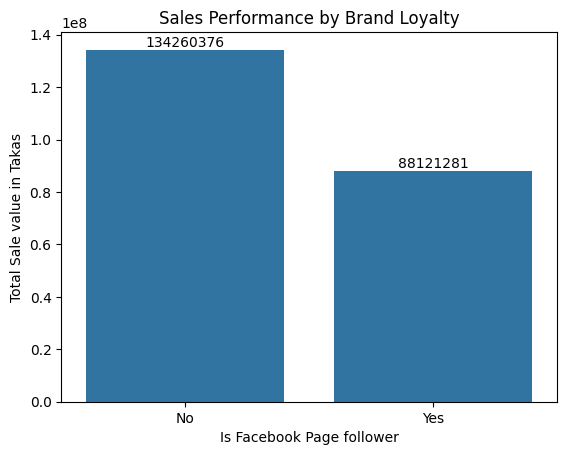

In [ ]:
ax = sns.barplot(data=purchase_trends_by_brand_loyalty, x='is_facebook_page_follower', y='sum')

for bar in ax.containers:
  ax.bar_label(bar, fmt="%.0f")

plt.title('Sales Performance by Brand Loyalty')
plt.xlabel('Is Facebook Page follower')
plt.ylabel('Total Sale value in Takas')
plt.show()

**Around 40% of Total Sales are from Facebook Page Followers**

### Sales Performance by Facebook Marketing

In [ ]:
purchase_trends_by_facebook_marketing = dataset.groupby('is_from_facebook_page')['price'].agg(["count", "mean", "max", "sum"])
purchase_trends_by_facebook_marketing

,count,mean,max,sum
is_from_facebook_page,,,,
No,5781,24994.565992,200436.0,144493586.0
Yes,3090,25206.495469,200465.0,77888071.0


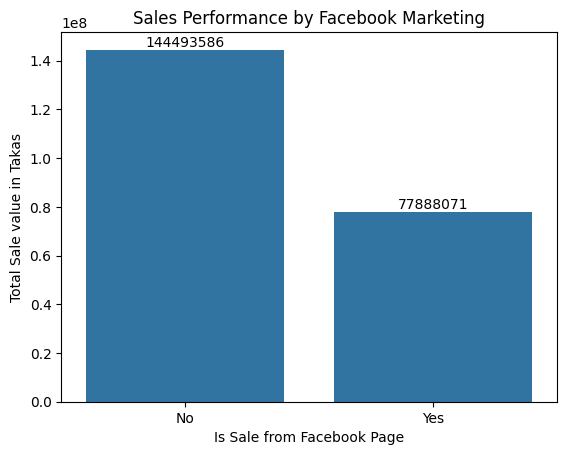

In [ ]:
ax = sns.barplot(data=purchase_trends_by_facebook_marketing, x='is_from_facebook_page', y='sum')

for bar in ax.containers:
  ax.bar_label(bar, fmt="%.0f")

plt.title('Sales Performance by Facebook Marketing')
plt.xlabel('Is Sale from Facebook Page')
plt.ylabel('Total Sale value in Takas')
plt.show()

**Around 35% of Total Sales are orginated from Facebook**

## Trends for Returning Customers

### Sales Volume by Returning Customers

In [ ]:
purchase_trends_by_returning_customers = dataset.groupby('is_returning_customer')['price'].agg(["count", "mean", "max", "sum"])
purchase_trends_by_returning_customers

,count,mean,max,sum
is_returning_customer,,,,
No,6677,24990.662723,200436.0,166862655.0
Yes,2194,25304.923428,200465.0,55519002.0


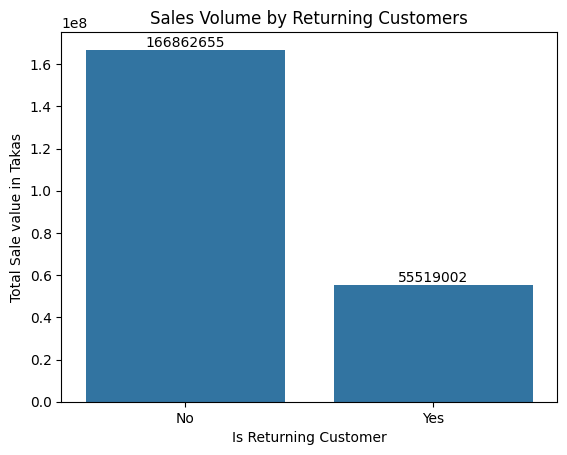

In [ ]:
ax = sns.barplot(data=purchase_trends_by_returning_customers, x='is_returning_customer', y='sum')

for bar in ax.containers:
  ax.bar_label(bar, fmt="%.0f")

plt.title('Sales Volume by Returning Customers')
plt.xlabel('Is Returning Customer')
plt.ylabel('Total Sale value in Takas')
plt.show()

**Returning Customers contribute to around 25% of total sales volume**

### Monthly Purchase Trends by Returning Customers

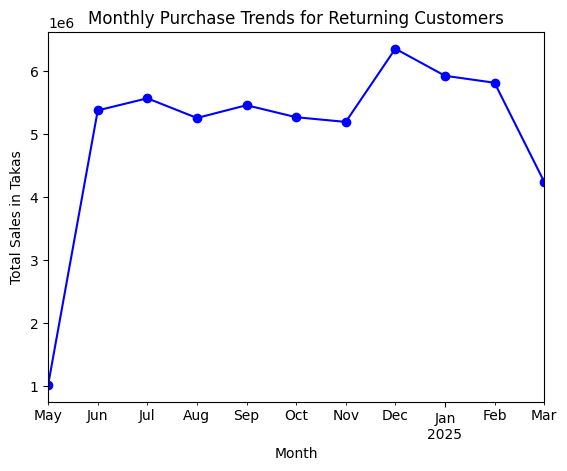

In [ ]:
dataset_of_returning_customers = dataset[dataset['is_returning_customer'] == 'Yes']
date_indexed_dataset = dataset_of_returning_customers.set_index('purchase_date')
monthly_sales = date_indexed_dataset.resample('ME')['price'].sum()
# print(monthly_sales)
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales in Takas')
plt.title('Monthly Purchase Trends for Returning Customers')
plt.show()

**Highest Sales are recorded by returning customers in December Month where as lowest sales are observed in May**

### Age Distribution of Returning Customers

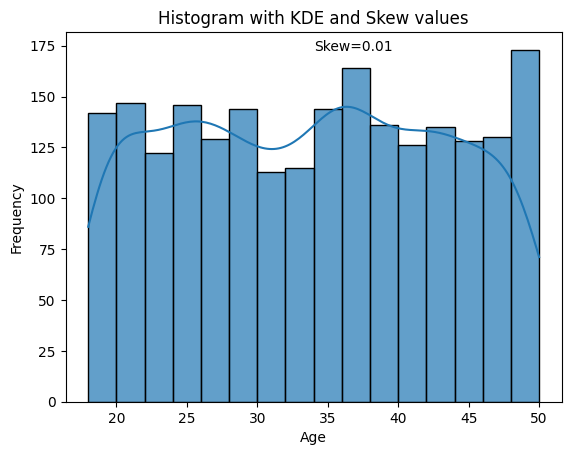

In [ ]:
sns.histplot(data=dataset_of_returning_customers['age'], bins=16, edgecolor='black', alpha=0.7, kde=True)
plt.annotate(text=f"Skew={np.round(skew(dataset_of_returning_customers['age']), decimals=2)}", xy=(0.5, 0.95), xycoords='axes fraction')
plt.title('Histogram with KDE and Skew values')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Gender Distribution

Text(0.5, 1.0, 'Frequency Counts of Gender')

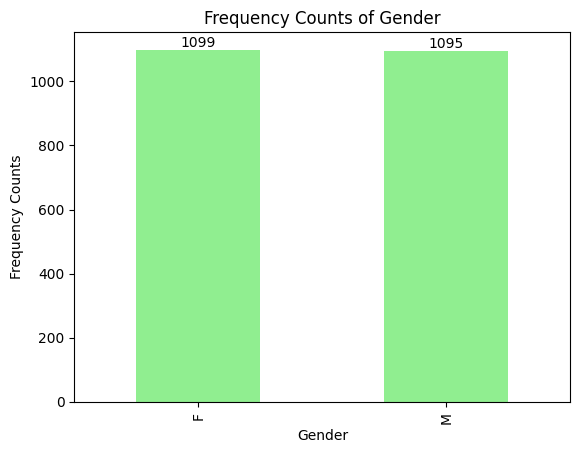

In [ ]:
gender_value_counts = dataset_of_returning_customers['gender'].value_counts()
ax = gender_value_counts.plot(kind='bar', color='lightgreen')
for idx, count in enumerate(gender_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Gender')
plt.ylabel('Frequency Counts')
plt.title('Frequency Counts of Gender')

### Mobile Models

Text(0.5, 1.0, 'Frequency Counts of Mobile Model')

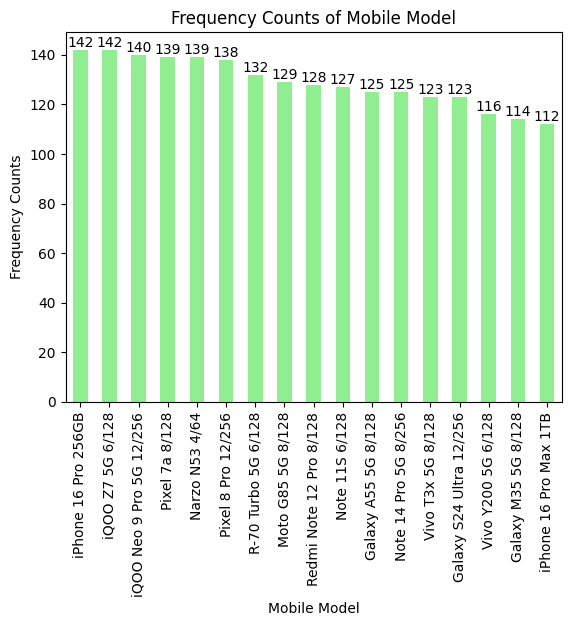

In [ ]:
mobile_model_value_counts = dataset_of_returning_customers['mobile_model'].value_counts()
ax = mobile_model_value_counts.plot(kind = 'bar', color = 'lightgreen')
for idx, count in enumerate(mobile_model_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Mobile Model')
plt.ylabel('Frequency Counts')
plt.title('Frequency Counts of Mobile Model')

### Facebook Marketing

Text(0.5, 1.0, 'Is From Face Book Page Frequency Counts')

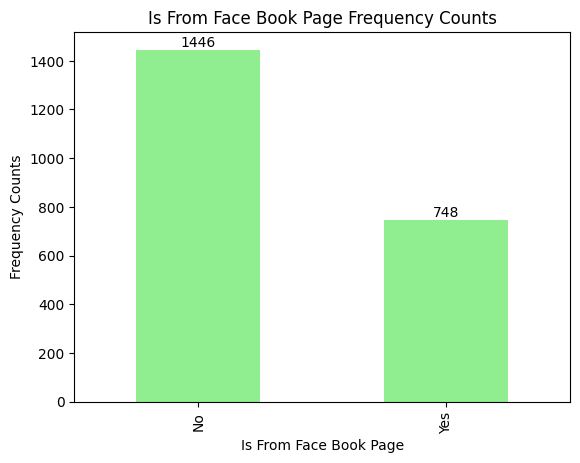

In [ ]:
is_from_facebook_page_value_counts = dataset_of_returning_customers['is_from_facebook_page'].value_counts()
# print(is_from_facebook_page_value_counts)
ax = is_from_facebook_page_value_counts.plot(kind='bar', color='lightgreen')

for idx, count in enumerate(is_from_facebook_page_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Is From Face Book Page')
plt.ylabel('Frequency Counts')
plt.title('Is From Face Book Page Frequency Counts')

**Around 34% of returning customer sales are from Facebook**

### Brand Loyalty

Text(0.5, 1.0, 'Face Book Page Follower Frequency Counts')

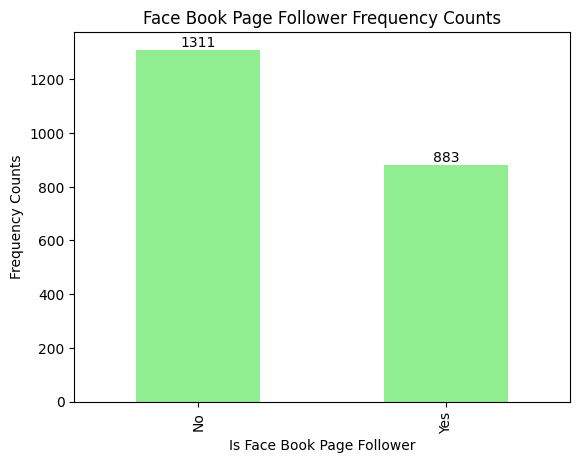

In [ ]:
is_facebook_page_follower_value_counts = dataset_of_returning_customers['is_facebook_page_follower'].value_counts()
# print(is_facebook_page_follower_value_counts)
ax = is_facebook_page_follower_value_counts.plot(kind='bar', color='lightgreen')

for idx, count in enumerate(is_facebook_page_follower_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Is Face Book Page Follower')
plt.ylabel('Frequency Counts')
plt.title('Face Book Page Follower Frequency Counts')

**Around 40% of Returning customers are shop's Facebook Page followers**

## Trends for Facebook Marketing

In [ ]:
dataset_for_facebook_marketing = dataset[dataset['is_from_facebook_page'] == 'Yes']

### Monthly Purchase Trends for Facebook marketing

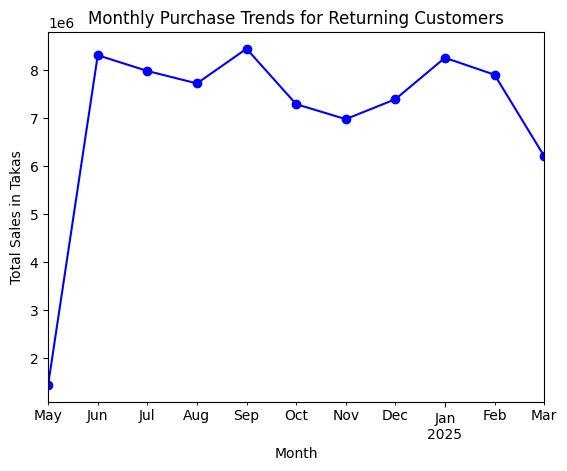

In [ ]:
date_indexed_dataset = dataset_for_facebook_marketing.set_index('purchase_date')
monthly_sales = date_indexed_dataset.resample('ME')['price'].sum()
# print(monthly_sales)
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales in Takas')
plt.title('Monthly Purchase Trends for Returning Customers')
plt.show()

**Highest Sale Value (From Facebook) is recorded in September Month where as lowest sale value is observed in May.**

### Age Distribution

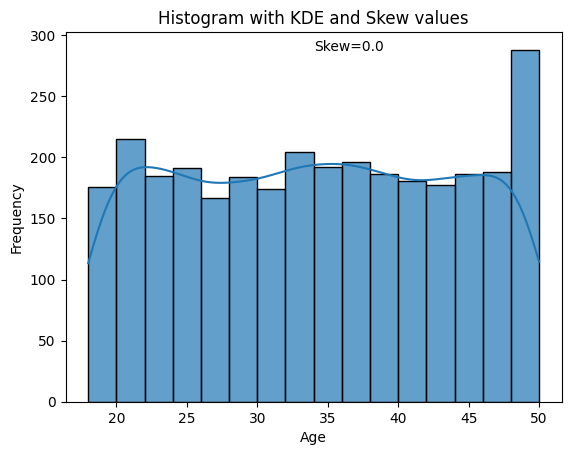

In [ ]:
sns.histplot(data=dataset_for_facebook_marketing['age'], bins=16, edgecolor='black', alpha=0.7, kde=True)
plt.annotate(text=f"Skew={np.round(skew(dataset_for_facebook_marketing['age']), decimals=2)}", xy=(0.5, 0.95), xycoords='axes fraction')
plt.title('Histogram with KDE and Skew values')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Gender Distribution

Text(0.5, 1.0, 'Frequency Counts of Gender')

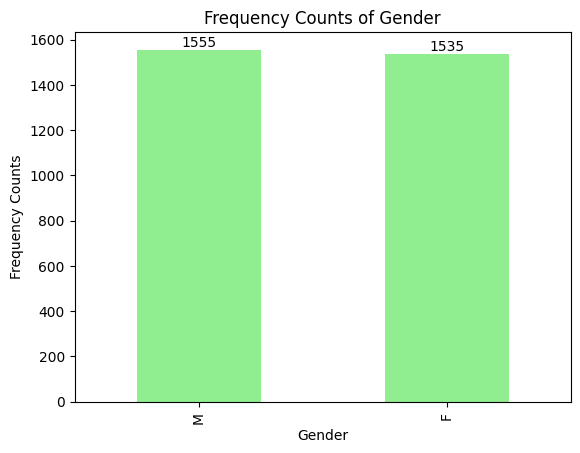

In [ ]:
gender_value_counts = dataset_for_facebook_marketing['gender'].value_counts()
ax = gender_value_counts.plot(kind='bar', color='lightgreen')
for idx, count in enumerate(gender_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Gender')
plt.ylabel('Frequency Counts')
plt.title('Frequency Counts of Gender')

### Mobile Models

Text(0.5, 1.0, 'Frequency Counts of Mobile Model')

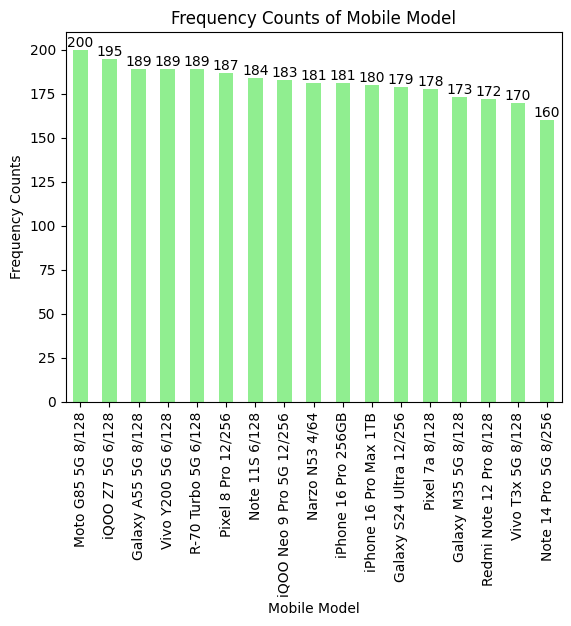

In [ ]:
mobile_model_value_counts = dataset_for_facebook_marketing['mobile_model'].value_counts()
ax = mobile_model_value_counts.plot(kind = 'bar', color = 'lightgreen')
for idx, count in enumerate(mobile_model_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Mobile Model')
plt.ylabel('Frequency Counts')
plt.title('Frequency Counts of Mobile Model')

**Out of sales generated from Facebook, Moto G85 5G 8/128 occupies first place with 200 sale count, where as Note 14 Pro 5G 8/256 takes last position with 160 Sale Count**

### Brand Loyalty

Text(0.5, 1.0, 'Face Book Page Follower Frequency Counts')

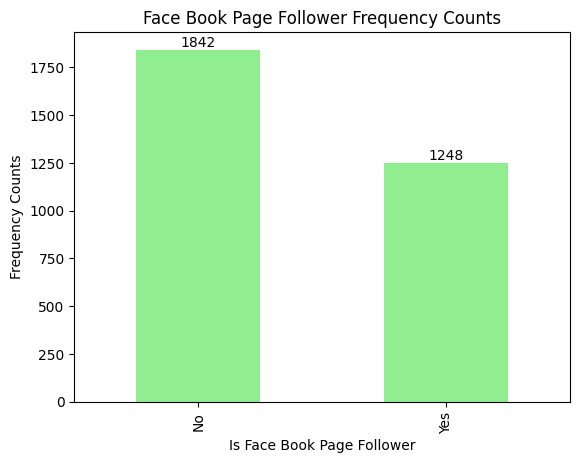

In [ ]:
is_facebook_page_follower_value_counts = dataset_for_facebook_marketing['is_facebook_page_follower'].value_counts()
# print(is_facebook_page_follower_value_counts)
ax = is_facebook_page_follower_value_counts.plot(kind='bar', color='lightgreen')

for idx, count in enumerate(is_facebook_page_follower_value_counts):
  ax.text(idx, count, str(count), ha='center', va='bottom')
plt.xlabel('Is Face Book Page Follower')
plt.ylabel('Frequency Counts')
plt.title('Face Book Page Follower Frequency Counts')

**Out of total number of sales from Facebook, around 40% of sales are from Mobile Shop's Facebook page followers.**

## Chi-Square Test

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def get_p_value(feature_column:str, target_column:str):
  contingency_table = pd.crosstab(dataset[feature_column],dataset[target_column])
  chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
  return round(p_val, 4)

In [ ]:
categorical_features = ['customer_location','gender', 'mobile_model', 'is_returning_customer','is_facebook_page_follower','awareness_through_marketing']
target = 'is_from_facebook_page'
for feature in categorical_features:
  print(f"p_val for feature {feature} is {get_p_value(feature, target)}")

p_val for feature customer_location is 0.4151
p_val for feature gender is 0.487
p_val for feature mobile_model is 0.8451
p_val for feature is_returning_customer is 0.4166
p_val for feature is_facebook_page_follower is 0.699
p_val for feature awareness_through_marketing is 0.7831


In [ ]:
categorical_features = ['customer_location','gender', 'mobile_model', 'is_from_facebook_page','is_facebook_page_follower','awareness_through_marketing']
target = 'is_returning_customer'
for feature in categorical_features:
  print(f"p_val for feature {feature} is {get_p_value(feature, target)}")

p_val for feature customer_location is 0.8272
p_val for feature gender is 0.9283
p_val for feature mobile_model is 0.3911
p_val for feature is_from_facebook_page is 0.4166
p_val for feature is_facebook_page_follower is 0.8893
p_val for feature awareness_through_marketing is 0.4754


**As all of the P values are > 0.05, There is no strong association or dependency between categorical features and target variables(is_from_facebook_page & is_returning_customer)**